In [10]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

In [14]:
  
files=(glob.glob("C:/Users/rohit.handa/Documents/names/*.txt",recursive=False))
df2 = pd.DataFrame(index=None,columns = ('name','sex','number','year'))


result = pd.concat([pd.read_csv(f,names = ('name','sex','number','year')) for f in files[1:]],axis=0, ignore_index=True,)

lst = []
for f in files[1:]:
    df = pd.read_csv(f)
    count = df.shape[0]
    
    
    for i in range(count+1):
        lst.append(f)
      

# add year as a column to each record

for i in range(len(lst)):
    lst[i]= re.findall('\d+',lst[i])
    lst[i] = lst[i][0]

result['year'] = lst

result.head(10)
    

,name,sex,number,year
0,Mary,F,6919,1881
1,Anna,F,2698,1881
2,Emma,F,2034,1881
3,Elizabeth,F,1852,1881
4,Margaret,F,1658,1881
5,Minnie,F,1653,1881
6,Ida,F,1439,1881
7,Annie,F,1326,1881
8,Bertha,F,1324,1881
9,Alice,F,1308,1881


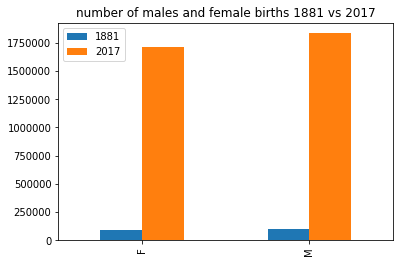

In [17]:

group_res = result.groupby(['name']).sum()['number']
#groupby sex and year
group_gender = result.groupby(['sex','year']).sum()['number'].unstack()
#compare_1880_2017 = group_gender
#group_gender.iloc[0][-1]
group_gender2 = pd.DataFrame(index = ['F','M'],columns=('1881','2017'))

group_gender2.iloc[0]['1881'] = group_gender.iloc[0]['1881']
group_gender2.iloc[1]['1881'] = group_gender.iloc[1]['1881']
group_gender2.iloc[0]['2017'] = group_gender.iloc[0]['2017']
group_gender2.iloc[1]['2017'] = group_gender.iloc[1]['2017']

group_gender2.plot.bar(title='number of males and female births 1881 vs 2017')

#oup_gender.plot.bar(xgroup_gender.columns,y=)



In [18]:
#convert groupby object into a dataframe
group_res1 = pd.DataFrame(group_res,columns=['name','number'])

In [20]:
#sort the number in descending order
sorted = group_res1.sort_values(by='number',axis=0,ascending=False)

In [21]:
sorted.head(10)

,name,number
name,,
James,NaN,5167879
John,NaN,5127441
Robert,NaN,4832488
Michael,NaN,4372182
Mary,NaN,4131268
William,NaN,4108991
David,NaN,3623356
Joseph,NaN,2611441
Richard,NaN,2571885


In [22]:
#find top 10 names
top10names = sorted.head(n=10) 


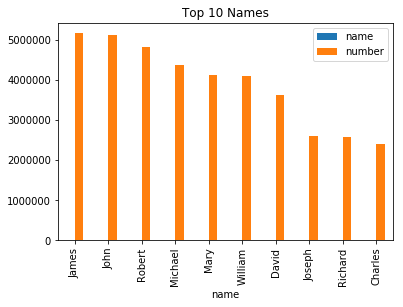

In [23]:
#plt.barh(list(top10names['name']),list(top10names['number']))
#plt.xlabel("Number of names")
#plt.ylabel("names")
top10names.plot.bar(title='Top 10 Names')

In [24]:
bottom10names = sorted.tail(n=10) 


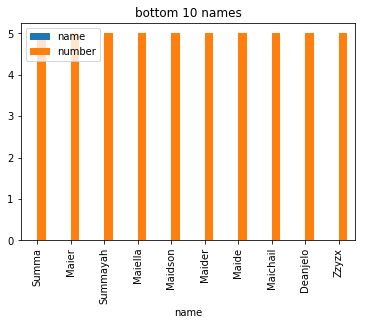

In [25]:
#plt.barh(list(bottom10names['name']),list(bottom10names['number']))
#plt.xlabel("Number of names")
#plt.ylabel("names")
bottom10names.plot.bar(title='bottom 10 names')

Text(0.5,1,'Gender split since 1881')

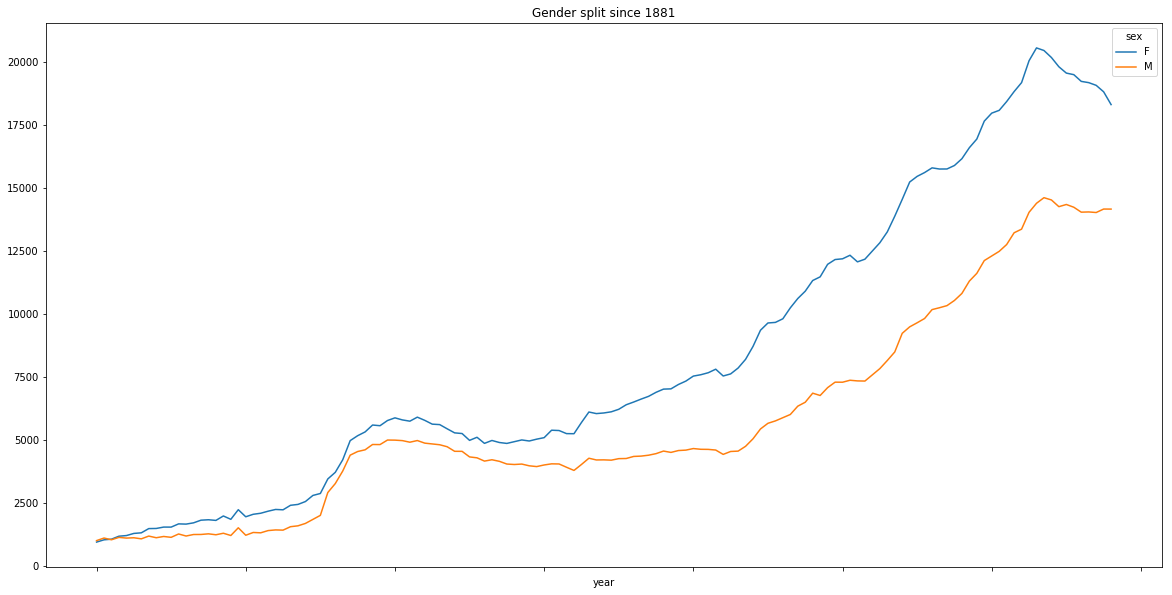

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
#result.groupby(['year','sex']).count()['number'].unstack().plot(ax=ax)
result.groupby(['year','sex']).count()['number'].unstack().plot(ax=ax)
#gen['year'] = gen.index
#gen.head(20)
#ax.plot(x=list(gen['M']),y=list(gen['F']))
ax.set_title('Gender split since 1881')



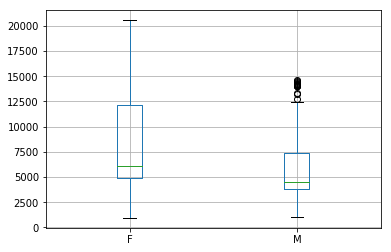

In [33]:
#Box plot of male vs female births since 1881
group_sex = result.groupby(['year','sex']).count()['number'].unstack()
group_sex.tail(10)

group_sex.boxplot()


In [35]:
#popular names in each year
popular = result.groupby(['year'])[['number']].max()
mer = pd.merge(popular,result,how='inner')
fin = mer.sort_values(by='year')
fin




,number,name,sex,year
0,8769,John,M,1881
2,9557,John,M,1882
6,8894,John,M,1883
9,9388,John,M,1884
12,9128,Mary,F,1885
14,9889,Mary,F,1886
16,9888,Mary,F,1887
17,11754,Mary,F,1888
18,11648,Mary,F,1889
19,12078,Mary,F,1890
